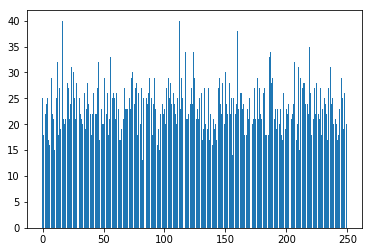

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import time
#import copy

np.random.seed(42)

# Generate initial distribution of labels
N_imgs = 10**3 # number of images
N_labels = 250 # number of different labels
all_labels = np.zeros((N_imgs, N_labels)) # perhaps uses too much memory?
mean_no_labels = 5 # becomes 1 larger below

for n in range(N_imgs):
    num_labels = np.random.poisson(mean_no_labels) + 1
    labels = np.random.randint(N_labels, size=num_labels)
    for j in range(N_labels):
        if j in labels:
            all_labels[n,j] = 1
    
# The initial, skewed distribution of labels that we want to even out
label_dist = np.sum(all_labels, axis=0) 
no_labels_init = np.sum(label_dist)
Z_init = np.sum(np.exp(-label_dist/no_labels_init))/N_labels
plt.bar(np.linspace(0,N_labels-1,N_labels),label_dist)
plt.show()

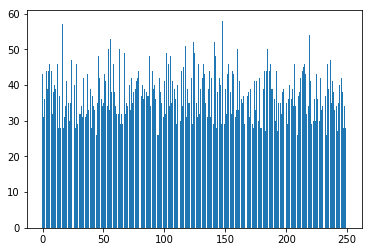

Final no. images:  1507
No. batches of generated "images":  26
Total runtime:  0.6438839435577393


In [30]:
# Find images with rarest label and augment those.

ratio = 1.5 # ratio of the final and initial number of images 
N_imgs_max = N_imgs*ratio
c = 0

t1 = time.time()
while N_imgs < N_imgs_max:    
    c += 1 # counter
    # Check if we have enough images
    N_imgs_now = all_labels.shape[0]
    if N_imgs_now >= N_imgs_max:
        break

    sorted_labels = np.sort(label_dist)
    sorted_label_ids = np.argsort(label_dist)
    rarest_label = sorted_label_ids[np.where(sorted_labels > 0)[0][0]]
    imgs_with_rarest_label = np.array([i for i in range(N_imgs) if all_labels[i,rarest_label]==1])
    all_labels = np.concatenate((all_labels, all_labels[imgs_with_rarest_label]), axis=0)
    label_dist = np.sum(all_labels, axis=0) # update the distribution of labels

    N_imgs = all_labels.shape[0] # update how many images there are after the just finished round of augmentation

# The final, non-skewed distribution of labels
label_dist = np.sum(all_labels, axis=0) 
plt.bar(np.linspace(0,N_labels-1,N_labels),label_dist)
plt.show()

t2 = time.time()

print('Final no. images: ', N_imgs)
print('No. batches of generated "images": ', c)
print('Total runtime: ', t2-t1)


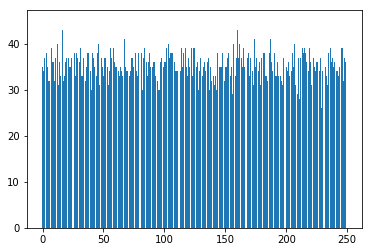

Final no. images:  1500
Inititial Z-value:  0.9960082836330797
Final Z-value:  0.9960080388317579
Smallest possible Z:  0.9960079893439915
Total runtime:  1.741882562637329
Ratio of tried to accepted augmentations:  0.35765379113018597


In [32]:
# Augment with images depending on how much they contribute to flatten the distribution of labels

ratio = 1.5 # ratio of the final and initial number of images 
N_imgs_max = N_imgs*ratio

# Counters
c_tot = 0
c_aug = 0

t1 = time.time()
while N_imgs < N_imgs_max:
    
    for k in range(N_imgs): # doesn't loop through the ones appended during the current loop        
        # Check if we have enough images
        N_imgs_now = all_labels.shape[0]
        if N_imgs_now == N_imgs_max:
            break
        
        no_labels = np.sum(label_dist)
        Z = np.sum(np.exp(-label_dist/no_labels))/N_labels # "energy" of system before augmentation
        # Try augmentation
        all_labels_aug = np.append(all_labels, [all_labels[k]], axis=0) 
        label_dist_aug = np.sum(all_labels_aug, axis=0) 
        no_labels_aug = np.sum(label_dist_aug)
        Z_aug = np.exp(-label_dist_aug/no_labels_aug).sum()/N_labels # "energy" of system after augmentation
        # Apply change if "energy" is lowered
        if Z_aug < Z:
            c_aug += 1
            all_labels = all_labels_aug
            label_dist = np.sum(all_labels, axis=0) # update the distribution of labels
        #elif  # chance to augment anyways
        
        c_tot += 1

    N_imgs = all_labels.shape[0] # update how many images there are after the just finished round of augmentation

# The final, non-skewed distribution of labels
label_dist = np.sum(all_labels, axis=0) 
plt.bar(np.linspace(0,N_labels-1,N_labels),label_dist)
plt.show()

t2 = time.time()

print('Final no. images: ', N_imgs)
print('Inititial Z-value: ', Z_init)
print('Final Z-value: ', Z)
min_Z = np.exp(-1/N_labels) # for a completely even distribution
print('Smallest possible Z: ', min_Z)
print('Total runtime: ', t2-t1)
print('Ratio of tried to accepted augmentations: ', c_aug/c_tot)

In [5]:
"""
# Roberta's idea
all_labels_norm = copy.deepcopy(all_labels)
for col in range(N_labels):
    all_labels_norm[:,col] = all_labels[:,col]/label_dist[col]
R_scores = all_labels_norm.sum(axis=1)
"""

"\n# Roberta's idea\nall_labels_norm = copy.deepcopy(all_labels)\nfor col in range(N_labels):\n    all_labels_norm[:,col] = all_labels[:,col]/label_dist[col]\nR_scores = all_labels_norm.sum(axis=1)\n"